# Одномерное Фурье-преобразование. Фильтрация сигнала

Преобразование Фурье - один из примеров *функционалов*, то есть это правило, по которому одной функции (например, $f(x)$) ставится в соответствие другая функция ($f(\omega)$). Функция $f(\omega)$ называется в этом случае *фурье-образом* функции $f(x)$. Общая формула для фурье-преобразования имеет вид
\begin{equation}
f(\omega) = \frac{1}{2\pi}\int\limits_{-\infty}^{\infty} f(x) e^{i\omega x} dx
\end{equation}

Преобразование Фурье используется во многих областях науки — в физике, оптике, акустике, статистике, криптографии, океанологии, обработке сигналов и изображений, геометрии и многих других.

В этом уроке мы будем использовать Фурье-преобразование для восстановления сигнала из зашумленных данных и для фильтрации двумерных изображений.

Подключаем необходимые библиотеки

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

Смоделируем сигнал, состоящий из двух синусоид, искаженных случайным шумом:
\begin{equation}
f(t )= \left( \sin 2 \pi  \omega t + \sin 4 \pi \omega t \right ) + 2\Delta,
\end{equation}
где $\Delta$ – случайное число, равномерно распределенное на отрезке $[-1,1]$.

Задаем длительность сигнала (1 с) и интервал дискретизации (0.0025 с).

In [3]:
tmax = 1
dt = 0.0025
t = np.arange(0, tmax, dt)

In [4]:
freq = 10
wave = np.sin(2 * np.pi * freq * t) + np.sin(2 * np.pi * 2 * freq * t)
noise = 2 * (2 * np.random.sample(t.size) - 1)

В таком случае наш сигнал будет выглядеть следующим образом 

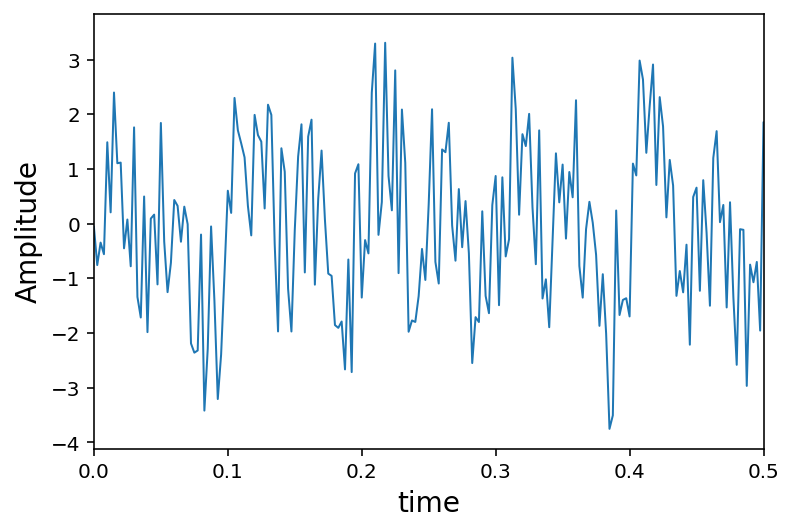

In [5]:
plt.plot(t, wave + noise, lw = 1, color = 'tab:blue', label = 'noisy') 
plt.xlim(0, 0.5)
plt.xlabel('time', fontsize = 14) 
plt.ylabel('Amplitude', fontsize = 14);

При помощи преобразования Фурье можно избавиться от шумов и восстановить исходный сигнал, воспользовавшись функцией `fft` из модуль `numpy.fft`. Здесь fft – аббревиатура от fast Fourier transform – быстрое преобразование Фурье.

Функция `numpy.fft.fft` осуществляет одномерное преобразование Фурье

В начале давайте получим фурье представление нашего зашумленного сигнала,  то есть

$$f(\omega) = \sum_{n=0}^N e^{-i\omega t_n}f(t_n)$$

$$e^{i\omega t_n} = cos(\omega t_n) - i sin(\omega t_n)$$

Таким образом преобразованная фукнция преставляет собой ряд из косинусов и синусов

$$f(\omega) = \sum_{n=0}^N f(t_n) (cos(\omega t_n) - i sin(\omega t_n))$$


In [6]:
signal = np.fft.fft(wave + noise, t.size)

Мы перевели наш временной сигнал в частотное пространство. Теперь получим сами частоты, для которых наш новых сигнал определен

In [7]:
freqs = np.fft.fftfreq(t.size, dt)

Мы хотим оценить вклад каждой из частот в разложении обратного Фурье-преобразования: $$f(t) = \sum_{m=0}^N f(\omega_m) e^{i\omega_m t} = \sum_{m=0}^N f(\omega_m) (cos(\omega_m t) - i sin(\omega_m t))$$

Из разложения видно, что вклад частоты  $\omega_m$ в результирующий сигнал определяется Фурье-образом $f(\omega_m)$. Для анализа и визуализации частотного содержания сигнала используется амплитудный спектр:

$$A_m = \sqrt{(Re[f(\omega_m)])^2 + (Im[f(\omega_m)])^2} = |f(\omega_m)|$$

С его помощью можно определить, какие частоты содержатся в сигнале и какие из них являются доминирующими. Это используется в различных задачах, таких как анализ музыки для приложений, связанных с обработкой звука, или анализ временных рядов в финансовой сфере.

In [8]:
Spectrum = np.abs(signal) / t.size
L = np.arange(1, t.size // 2, dtype = int)

На спектральном графике видны два высоких пика. Они соответствуют частотам, присутствующим в чистом сигнале ($\omega =10$ и $\omega =20$). Все остальные пики – частотный спектр, возникший из-за зашумления сигнала:

Text(0, 0.5, 'Spectral weight')

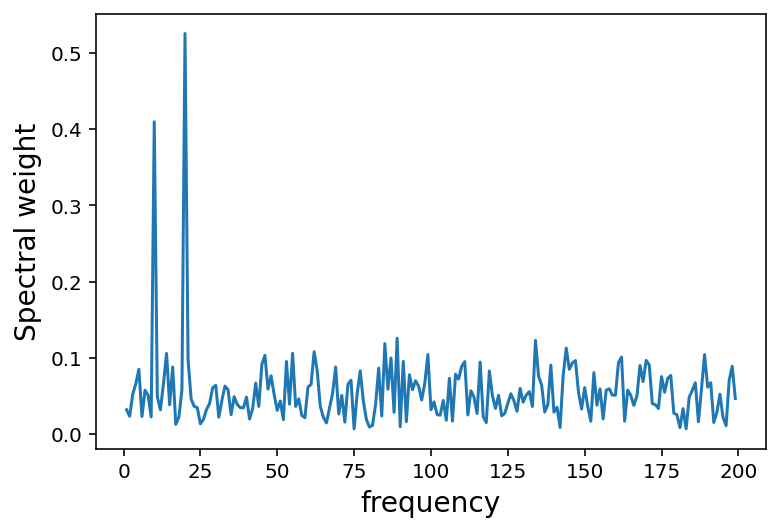

In [9]:
plt.plot(freqs[L], Spectrum[L])
plt.xlabel('frequency', fontsize = 14)
plt.ylabel('Spectral weight', fontsize = 14)

Наша задача – отделить истинный спектр сигнала от шума. Для этого выберем границу спектрального веса, ниже которой весь сигнал мы будем считать шумом (то есть применим спектральный фильтр):

Text(0, 0.5, 'Spectral weight')

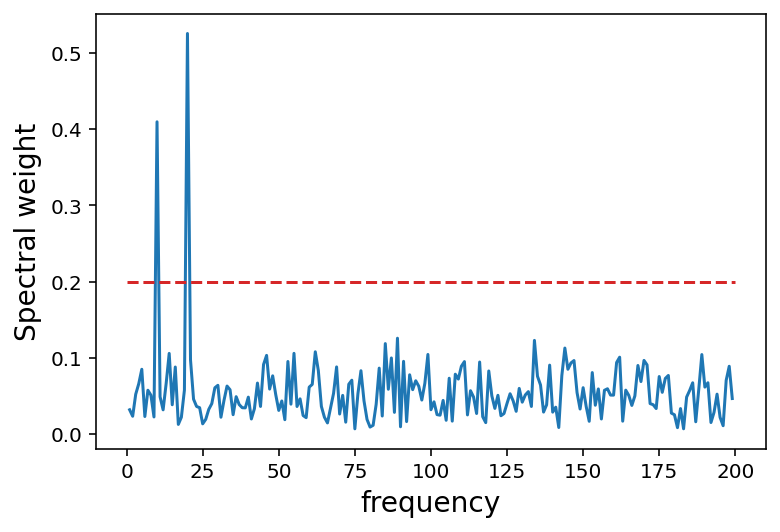

In [10]:
plt.plot(freqs[L], Spectrum[L])
plt.hlines(0.2, 0, 200, ls = '--', color = 'tab:red')
plt.xlabel('frequency', fontsize = 14)
plt.ylabel('Spectral weight', fontsize = 14)

Удалим из спектра все частоты, спектральный вес которых меньше границы:

In [11]:
ind = Spectrum > 0.2 
Spectrum_clean = Spectrum * ind

Отфильтрованный спектр показан красным цветом:

Text(0, 0.5, 'Spectral weight')

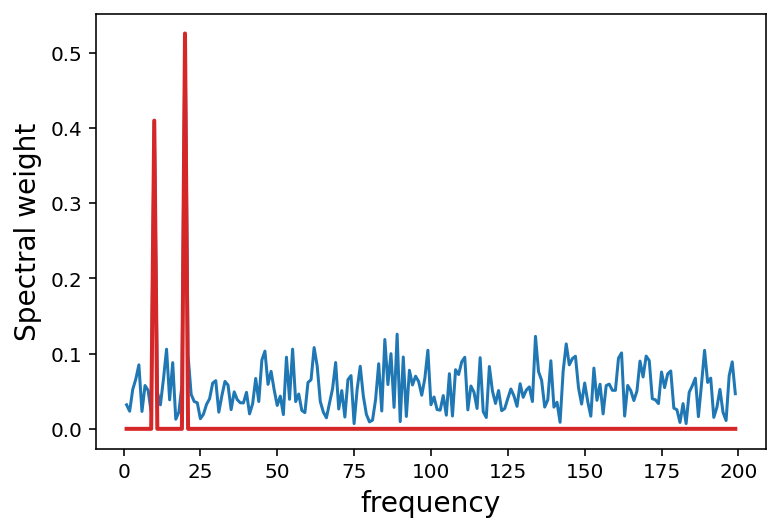

In [12]:
plt.plot(freqs[L], Spectrum[L])
plt.plot(freqs[L], Spectrum_clean[L], lw=2, color='tab:red')
plt.xlabel('frequency', fontsize=14)
plt.ylabel('Spectral weight', fontsize=14)

Давайте посмотрим на зашумленный и отфильтрованный амплитудные спектры. Мы видим, что фильтрация произведена правильно и в отфильтрованном амплитудном спектре содержатся лишь два доминирующих пика.

Теперь при помощи обратного преобразования Фурье 

$$f(t) = \sum_{n=0}^N e^{i\omega_n t}f(\omega_n)$$
из отфильтрованного спектра восстанавливаем сигнал и убеждаемся, что он совпадает с исходным:

Такую же фильтрацию произведем над фурье-образом, для того чтобы получить отфильтрованный сигнал после обратного фурье преобразования, которое выполним при помощи функции ifft

In [13]:
signal_clean = ind * signal
isignal = np.fft.ifft(signal_clean)

Посмотрим на наш изначальный зашумленный и отфильтрованный сигналы. Мы видим, что получившийся отфильтрованный сигнал не содержит в себе шумов и действительно представляет собой лишь сумму двух синусоид.

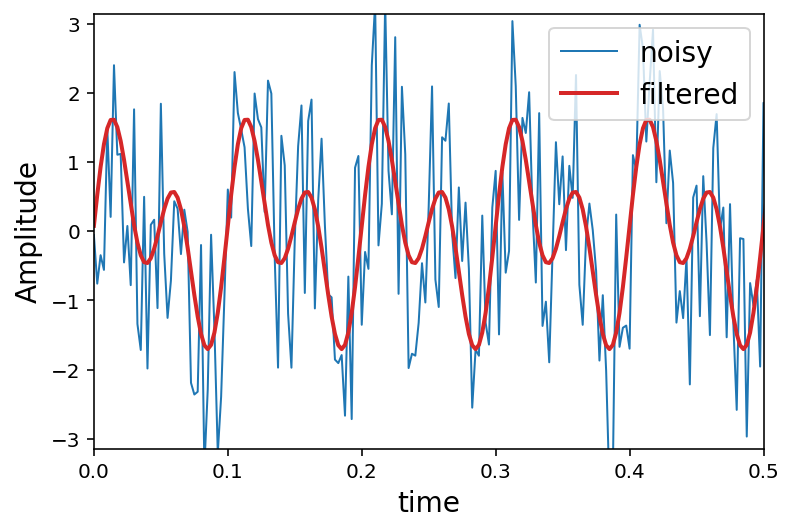

In [14]:
plt.plot(t, wave + noise, color = 'tab:blue', lw = 1, zorder = 1, label = 'noisy')
plt.plot(t, isignal.real, '-', color = 'tab:red', lw = 2, ms = 5, label = 'filtered')
plt.xlabel('time', fontsize = 14)
plt.ylabel('Amplitude', fontsize = 14)
plt.xlim(0, 0.5)
plt.ylim(-np.pi, np.pi)
plt.legend(loc = 'upper right', fontsize = 14, frameon = True)

# Двумерное Фурье-преобразование. Фильтрация изображения

Двумерное преобразование Фурье используется в самых различных областях науки и техники, а также для обработки изображений. Мы решим задачу аналогичную разобранной выше о восстановлении сигнала (изображения) путем фильтрации шума, но теперь в двумерном случае.

Задаем пространственную сетку, на которой будет определен сигнал:

In [15]:
xmax, ymax = 1, 1
dx,dy = 0.01, 0.01
x,y = np.arange(0, xmax, dx), np.arange(0, ymax, dy)

В каждой точке $\{x,y\}$ амплитуда сигнала определяется следующим выражением:
\begin{equation}
I(x,y)=(\sin 2 \pi \omega_x x + \sin 4 \pi \omega_x x)(\sin 2 \pi \omega_y y + \sin 4 \pi \omega_y y),
\end{equation}
где
\begin{equation}
\omega_x = 10, \omega_y = 20.
\end{equation}


Функция  `tensordot` позволяет тензорно (т.е. каждый с каждым) перемножить элементы двух массивов и получить матрицу. На языке формул это означает следующее:

`I = np.tensordot(x, y, axes = 0)` эквивалентно  $I_{ij} = x_i  y_j$

In [16]:
f0x = 10
f0y = 20

In [17]:
fx = np.sin(2 * np.pi * f0x * x) + np.sin(2 * np.pi * 2 * f0x * x)
fy = np.sin(2 * np.pi * f0y * y) + np.sin(2 * np.pi * 2 * f0y * y)

In [18]:
I = np.tensordot(fx, fy, axes = 0)

Построим изображение сигнала:

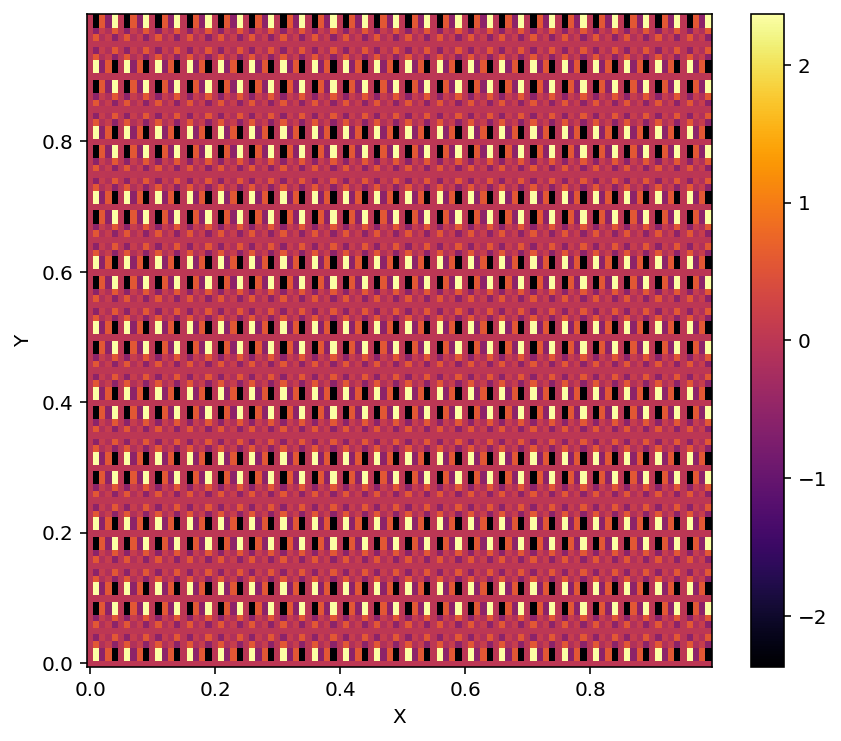

In [19]:
X,Y = np.meshgrid(x,y)
plt.figure(figsize = (7,6))
plt.pcolor(X, Y, I, cmap = 'inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar();

Теперь добавим к сигналу случайный шум $I_n = 4\Delta$, где $\Delta$ – число, равномерно распределенное на отрезке $[-1,1]$.

In [20]:
noise = 4 * (2 * np.random.random_sample((x.size, y.size)) - 1)

Получившийся сигнал мало похож на исходный:

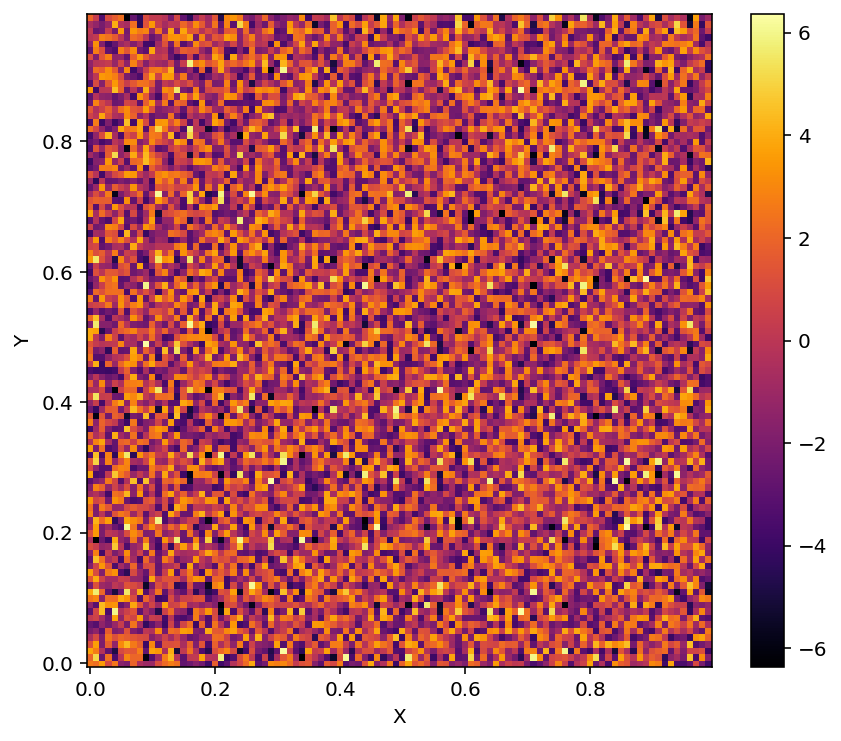

In [21]:
plt.figure(figsize = (7,6))
plt.pcolor(X, Y, I + noise, cmap = 'inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar();

Тем не менее сигнал может быть восстановлен при помощи преобразования Фурье.

In [22]:
fI = np.fft.fft2(I + noise)
freqx = np.fft.fftfreq(x.size, dx)
freqy = np.fft.fftfreq(y.size, dy)

Lx = np.arange(1, np.floor(x.size/2), dtype = int)
Ly = np.arange(1, np.floor(x.size/2), dtype = int)

In [23]:
Spectrum = np.abs(fI) / x.size / y.size
Fx, Fy = np.meshgrid(freqx[Lx], freqy[Ly])

На рисунке отчетливо видны четыре пика, соответствующих частотам $\omega_x=10, \, 20$ и $\omega_y=20, \, 40$:

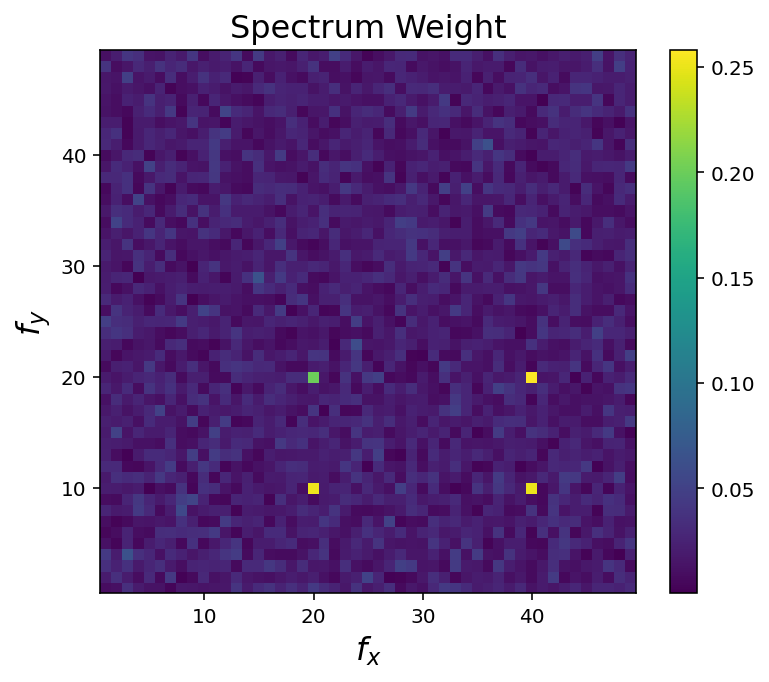

In [24]:
plt.figure(figsize = (6,5))
plt.title('Spectrum Weight', fontsize = 16)
plt.pcolor(Fx, Fy, Spectrum[Lx][:, Ly])
plt.xlabel('$f_x$', fontsize = 16)
plt.ylabel('$f_y$', fontsize = 16)
plt.colorbar();

Оставляем частоты, амплитудный спектр которых выше определенного значения. Фильтруем сигнал и восстанавливаем исходное изображение, используя обратное Фурье преобразование, которое в этот раз осуществляется при помощи функции `ifft2`:

In [25]:
ind = Spectrum > 0.1
I_filtered = np.fft.ifft2(fI * ind)

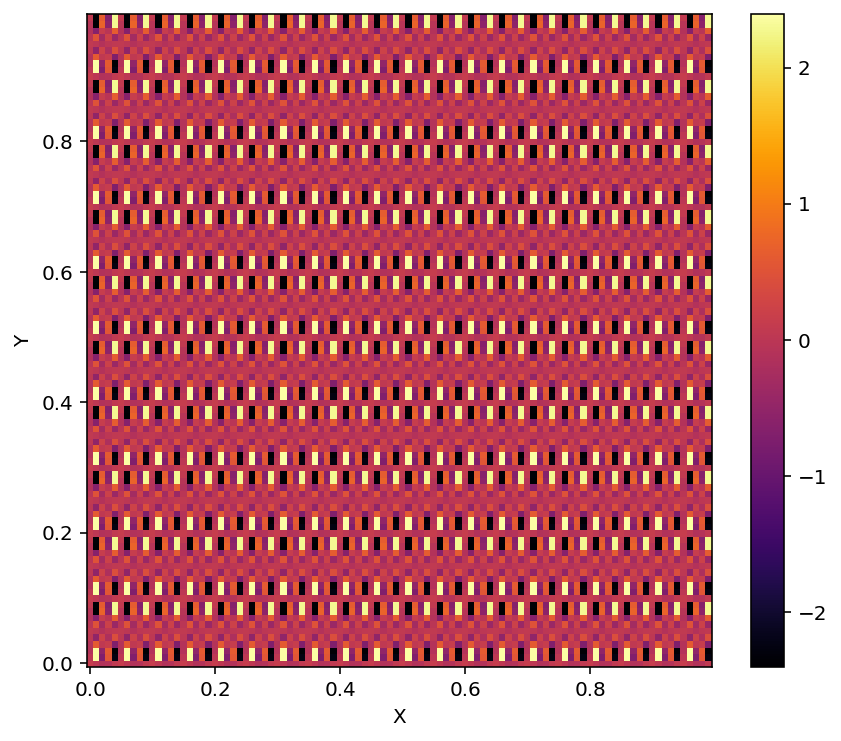

In [26]:
plt.figure(figsize = (7,6))
plt.pcolor(X, Y, I_filtered.real, cmap = 'inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar();

# Эксперимент Аббе–Портера

В прошлых уроках мы меняли вид исходного сигнала при помощи фильтрации Фурье-образа этого сигнала. Сейчас мы рассмотрим, как на практике такую фильтрацию осуществили в эксперименте Аббе-Портера. В эксперименте присутствует источник света, на который наложена непроницаемая решетка, и линза. В фокальной плоскости линзы формуриется изображение, соответствующее Фурье-образу сигнала от источника. Помещая экраны или маски различной геометрии в фокальной плоскости, можно производить пространственную фильтрацию определенных частот в Фурье-образе, меняя таким образом изображение, которое формируется на больших расстониях от линзы и, в свою очередь, соответсвует обратному Фурье-образу от изображения в фокальной плоскости.

<table border="1" width="100%">
 <tr>
    <td width="15%" bgcolor="#ffffff" > 
    </td>
    <td bgcolor="#ffffff"><img src="https://s1.hostingkartinok.com/uploads/images/2023/04/e889038c40ee2dfdc7587aca9cdd7a5b.png" align="right"></td>
     <td width="15%" bgcolor="#ffffff" > 
    </td>
 </tr>
</table>

<!-- [<img src="https://s1.hostingkartinok.com/uploads/images/2023/04/e889038c40ee2dfdc7587aca9cdd7a5b.png" width="500"/>](Abbe.png) -->

В этом уроке мы реализуем модель эксперимента Аббе-Портера, и посмотрим как от вида фильтра будет зависеть получающееся изображение

Рассмотрим квадратный источник света, на который наложена непроницаемая решетка, параметры и вид которой задаются следующим кодом. Массив $G$, состоящий из нулей и единиц, определяет, приходит ли из точки $(x,y)$ свет ($G(x,y)=1$) или эта точка закрыта решеткой ($G(x,y)=0$):

In [29]:
a = 0.08 
b = 0.02
Nx = 4 
Ny = 4

In [30]:
Lx = Nx * (a + b) 
Ly = Ny * (a + b)
dx = 0.005
dy = 0.005
x = np.arange(0, Lx, dx)
y = np.arange(0, Ly, dy) 

In [31]:
Gx = np.zeros(x.size)
Gy = np.zeros(y.size)
for n in range(Nx):
    Gx[int( (b/2 +  (a + b) * n) / dx) : int( ((a + b) * n + a + b/2) / dx)] = 1
for n in range(Ny):
    Gy[int( (b/2 +  (a + b) * n) / dy) : int( ((a + b) * n + a + b/2) / dy)] = 1
G = np.tensordot(Gx, Gy, axes = 0)

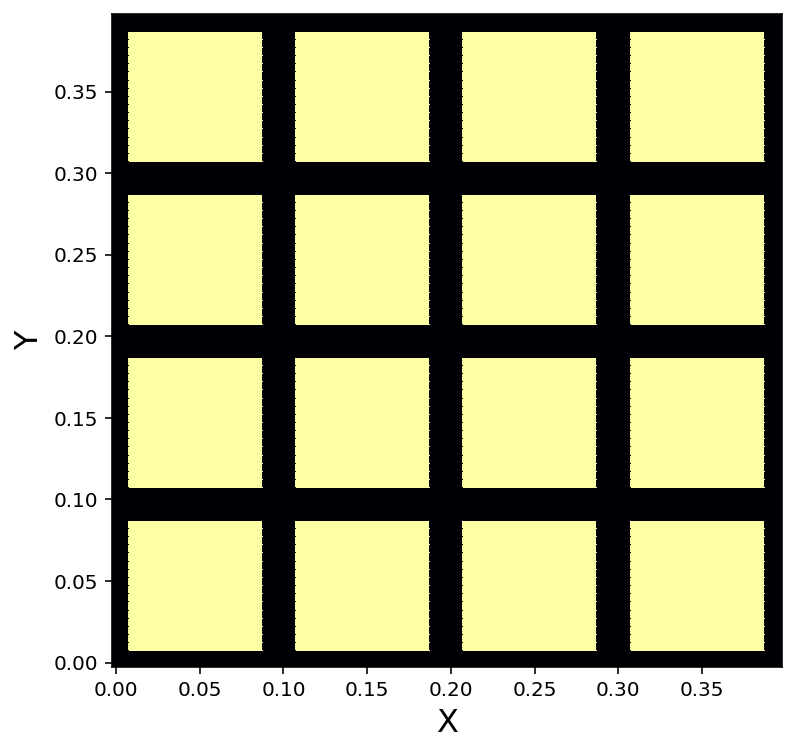

In [32]:
X,Y = np.meshgrid(x,y)
plt.figure(figsize = (6,6))
plt.pcolormesh(X, Y, G, cmap = 'inferno', ec = 'face')
plt.xlabel('X', fontsize = 16)
plt.ylabel('Y', fontsize = 16);

Выполним быстрое преобразвание Фурье над нашим двумерным сигналом:

In [33]:
fG = np.fft.fft2(G)
freqx = np.fft.fftfreq(x.size ,dx)
freqy = np.fft.fftfreq(y.size ,dy)

Для того, чтобы график был более наглядным, при помощи функции fftshift сдвинем нулевые частоты в центр графика:

In [34]:
I = np.abs(np.fft.fftshift(fG))**2
I = I / I.max()
I[I < 1e-8] = 1e-8  

Амплитуды сигнала на разных частотах будут очень сильно различаться, поэтому цветовая палитра, отвечающая интенсивности, должна быть определена в логарифмическом масштабе. Для этого необходимо подключить функцию LogNorm из модуля matplotlib.colors:

In [35]:
from matplotlib.colors import LogNorm

Из рисунка видно, что в спектре сигнала присутствует большое количество частот, которые сильно различаются по интенсивности:

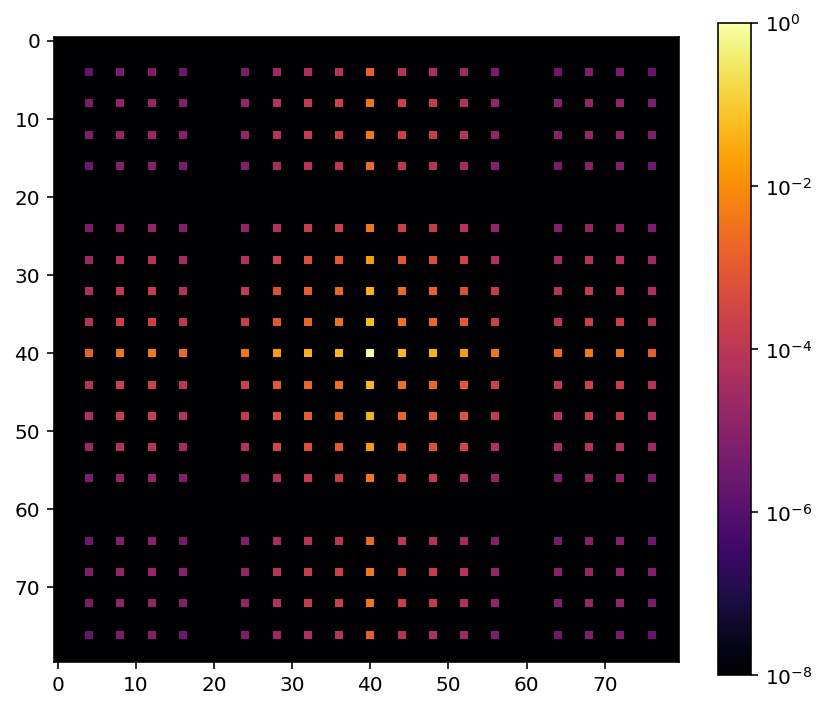

In [36]:
plt.figure(figsize = (7,6))
plt.imshow(I, norm=LogNorm(vmin=I.min(), vmax=I.max()), cmap = 'inferno')
plt.colorbar()

Определим квадратный фильтр, который будет отсекать частоты выше заданных границ $x_0, y_0$ по каждой из двух осей. В реальном эксперименте этот фильтр представляет собой непроницаемую заслонку, которая отсекает часть изображения в фокальной плоскости.

In [37]:
def SquareFilter(x, y, x0, y0):
    return np.tensordot(abs(y) < y0, abs(x) < x0, axes = 0)

Используем теперь фильтр для отсечения всех частот по оси $x$, кроме нулевой. По оси $y$ при этом частоты остаются нетронутыми. 

In [38]:
I = (np.abs(np.fft.fftshift(fG * SquareFilter(freqx,freqy, x0 = freqx[1], y0 = np.inf)))**2) 
I = I / I.max()
I[I < 1e-8] = 1e-8

На следующем рисунке показано, какие частоты проходят через фильтр.

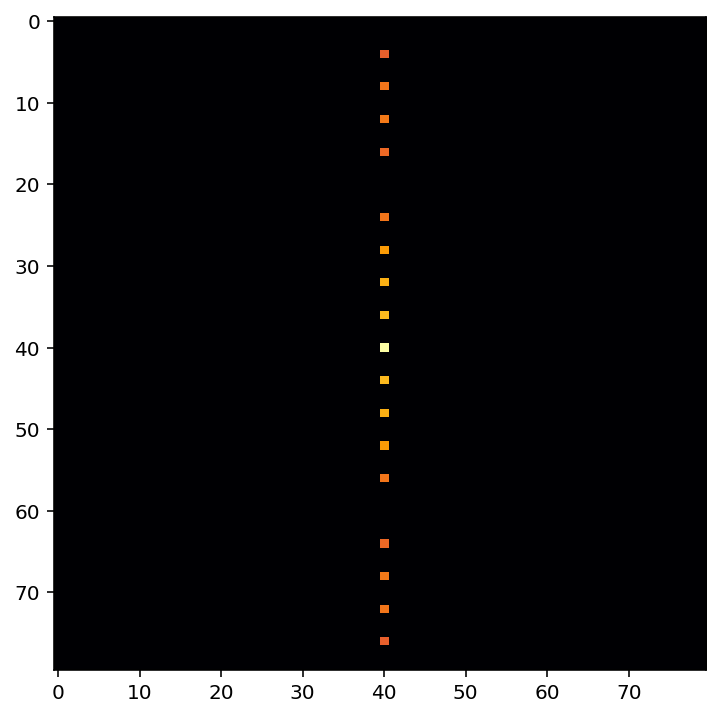

In [39]:
plt.figure(figsize = (6,6))
plt.imshow(I , norm=LogNorm(vmin=I.min(), vmax=I.max()), cmap = 'inferno')

После такого фильтра на большом расстоянии от линзы появляется картина из горизонтальных полос, которую и наблюдают в эксперименте:

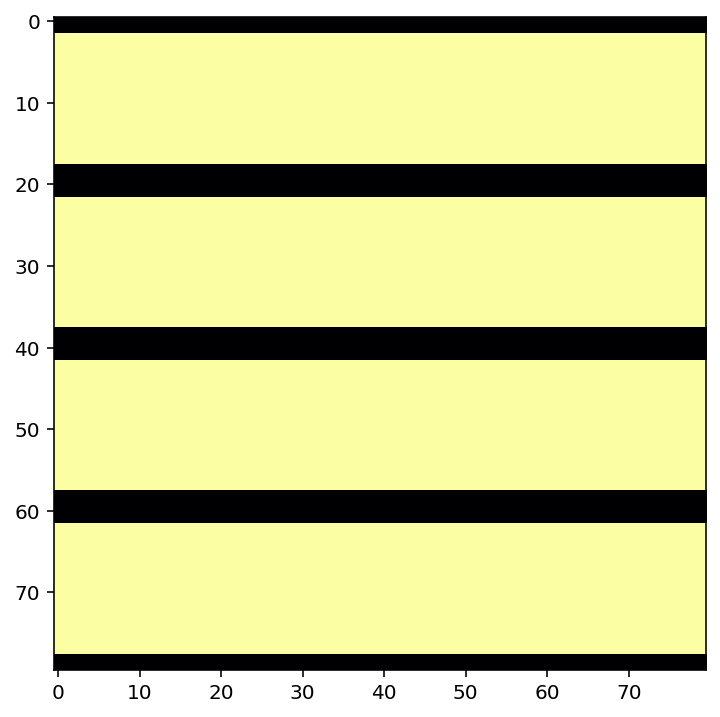

In [40]:
ifG = np.fft.ifft2(fG * SquareFilter(freqx,freqy, x0 = freqx[1], y0 = np.inf))
plt.figure(figsize = (6,6))
plt.imshow(ifG.real, cmap = 'inferno')

Аналогичный фильтр по частотам вдоль $y$ приводит к появлению вертикальных полос:

In [41]:
I = (np.abs(np.fft.fftshift(fG * SquareFilter(freqx,freqy, x0 = np.inf, y0 = freqy[1])))**2) 
I = I / I.max()
I[I < 1e-8] = 1e-8

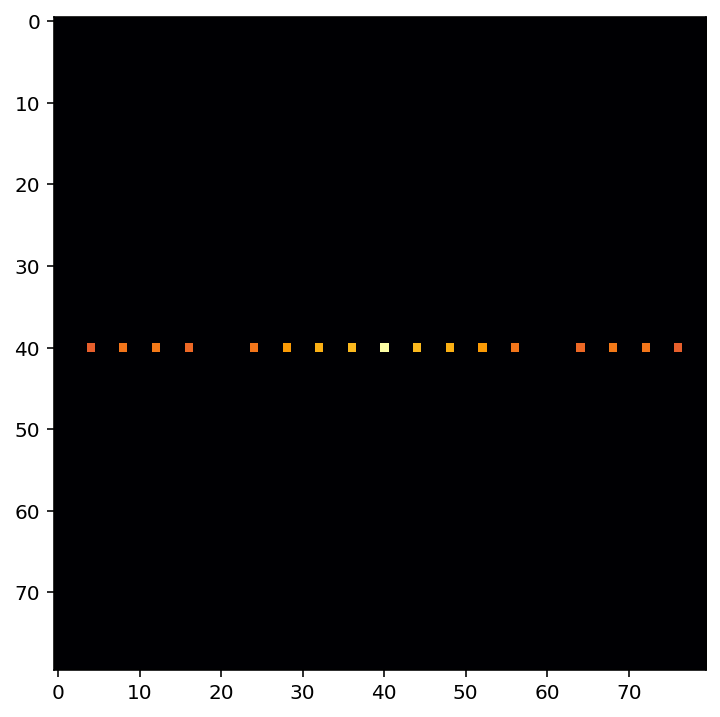

In [42]:
plt.figure(figsize = (6,6))
plt.imshow(I , norm=LogNorm(vmin=I.min(), vmax=I.max()), cmap = 'inferno')

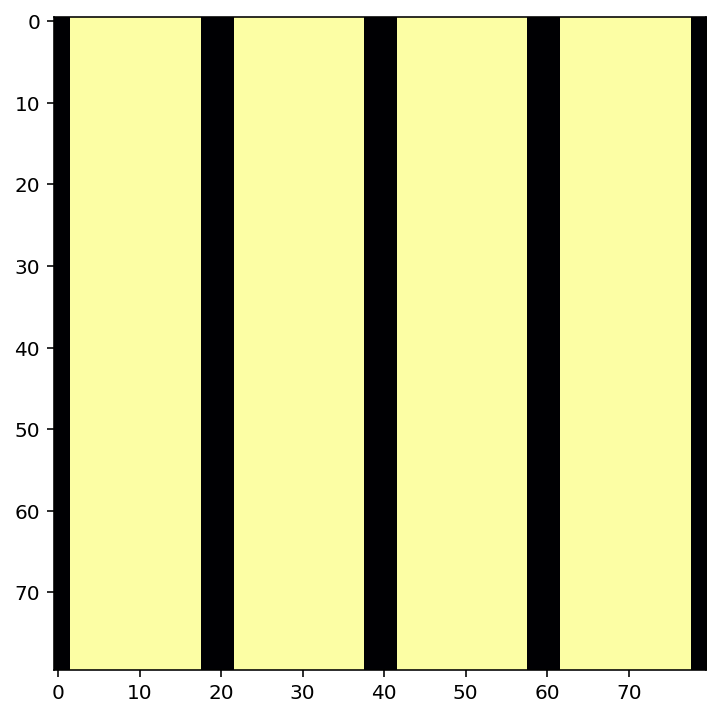

In [43]:
ifG = np.fft.ifft2(fG * SquareFilter(freqx,freqy, x0 = np.inf, y0 = 1))
plt.figure(figsize = (6,6))
plt.imshow(ifG.real, cmap = 'inferno')

Теперь при помощи фильтра вырежем в частотном спектре квадратный сектор:

In [44]:
I = (np.abs(np.fft.fftshift(fG * SquareFilter(freqx,freqy, x0 = freqx[10], y0 = freqy[10])))**2) 
I = I / I.max()
I[I < 1e-8] = 1e-8

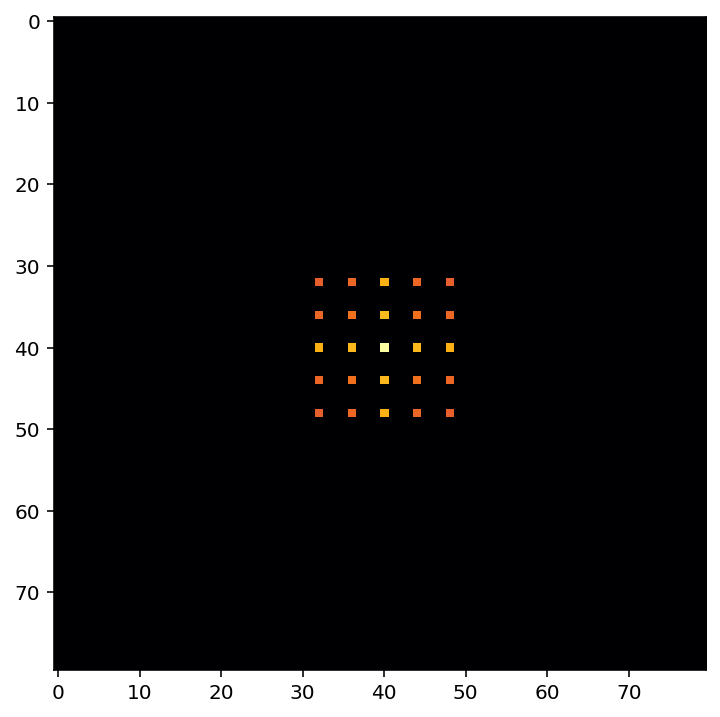

In [45]:
plt.figure(figsize = (6,6))
plt.imshow(I , norm=LogNorm(vmin=I.min(), vmax=I.max()), cmap = 'inferno')

На экране после такого фильтра возникает следующая картина:

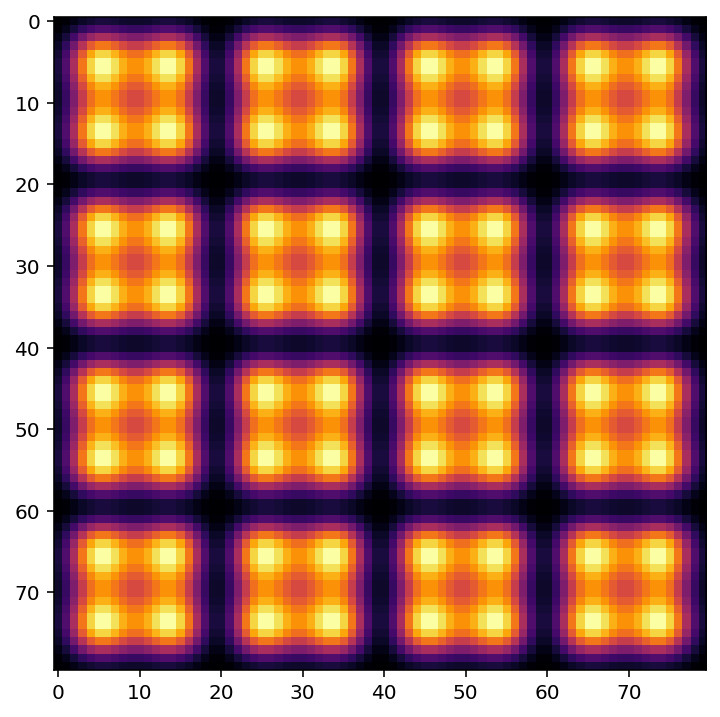

In [46]:
plt.figure(figsize = (6,6))
ifG = np.fft.ifft2(fG * SquareFilter(freqx,freqy, x0 = freqx[10], y0 = freqy[10]))
plt.imshow(ifG.real, cmap = 'inferno')